In [23]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

def prepare_plot(name_x, name_y):
    fig, ax = plt.subplots(figsize = (10, 8))
    ax.minorticks_on()
    ax.grid(which = 'major')
    ax.grid(which = 'minor', linestyle = ':')
    ax.set_ylabel(name_y)
    ax.set_xlabel(name_x)
    return ax

def max_sigma(y, ya):
    if (len(y) != len(ya)):
        print("ERROR! func max_sigma, len(y) != len(ya)\n")
        return
    max_sigma = 0.0
    i = 0
    for elem in y:
        if (abs(elem - ya[i]) > max_sigma):
            max_sigma = abs(elem - ya[i])
    return max_sigma

def max_delta_x(x):
    return max(x) - min(x)

def drow_line(ax_cur, x, y, x_err=0, y_err=0, line_color="red"):
    ax_cur.errorbar(x, y, xerr=x_err, yerr=y_err, fmt='o', color=line_color)
    p = np.polyfit(x, y, 1)
    ya = np.polyval(p, x)
    df_local = pd.DataFrame()
    df_local['x'] = x
    df_local['ya'] = ya
    df_local.sort_values(by=['x'])
    ax_cur.plot(df_local['x'], df_local['ya'], linestyle='dashed', color=line_color)
    k = (ya[1] - ya[0]) / (x[1] - x[0])
    delta_k = 12 ** 0.5 * max_sigma(y, ya) / max_delta_x(x) / len(x) ** 2
    print("k =", k, '(' + line_color + ')')
    print("delta k =", delta_k)

k = 0.48550343646822464 (blue)
delta k = 0.03400986116712747


,x,y,delta_y,eps_y
0,3.030303,1.22,0.12,0.098361
1,2.631579,0.84,0.12,0.142857
2,2.173913,0.64,0.12,0.187500
3,1.886792,0.54,0.12,0.222222
4,1.562500,0.42,0.12,0.285714
5,1.333333,0.34,0.12,0.352941
6,1.204819,0.24,0.12,0.500000


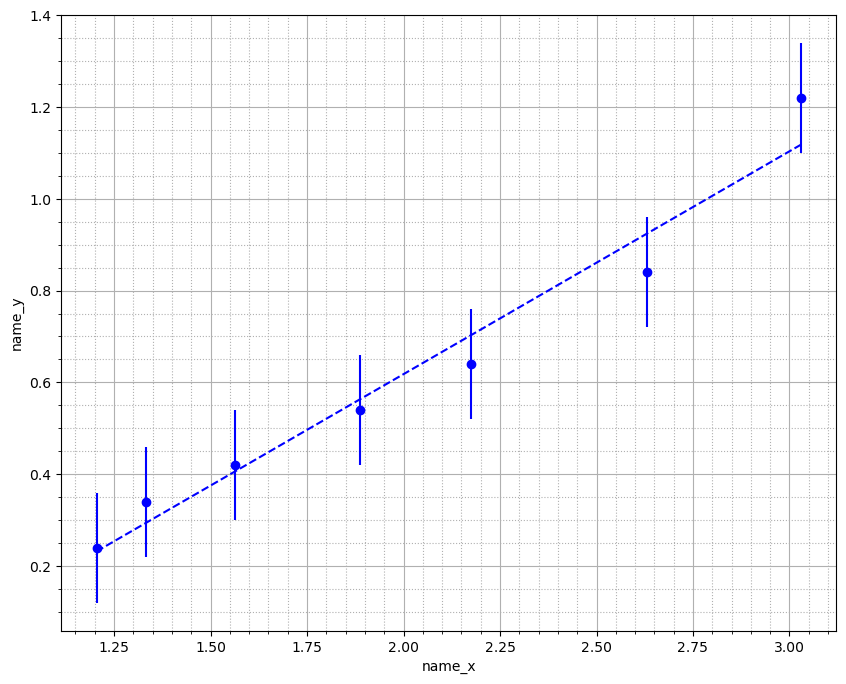

In [24]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

x = [1/0.33, 1/0.38, 1/0.46, 1/0.53, 1/0.64, 1/0.75, 1/0.83]
y = [1.22, 0.84, 0.64, 0.54, 0.42, 0.34, 0.24]

data = pd.DataFrame()
data['x'] = x
data['y'] = y

data['delta_y'] = 0.12
data['eps_y'] = data['delta_y'] / data['y']

ax1 = prepare_plot("name_x", "name_y")
drow_line(ax1, x, y, 0, data['delta_y'], "blue")
data
